##  <center>Chapter 4: Pandas</center>

After reading this chapter, readers will be able to:

- Set up pandas
- Read csv files stored on local machine into python environment
- Perform basic analysis by using variety of methods 
-  Plot dataframes

<img title = "pandas" src="pandas.jpg" width="500" height = "100"/>

## 4.1 Introduction

**Pandas** are cute and adorable and extremely lazy! However, our pandas in Python is everything but slow. Pandas is fast. It is so fast that it has been used extensively in production in financial applications. 

Pandas in python provide fast, flexible, and expressive data structures designed to make working with labeled data easy and intuitive. 

Pandas works very well with:
 
- Tabular data with both homogenous and heterogenous data. This include Excel files, .csv files, and SQL tables
- Time-series data (data where time is used as index. For example, financial time-series, hourly temperature for a city in given year)
- Any other observational data. Recall the grading and car dealership examples from previous two chapters. We can handle all of these heterogeneous observational datasets in Pandas. 

## 4.2 Setting up pandas
In this chapter, we will use car sales data (thanks to our friends at Kaggle!) and learn how Pandas can be used to process and get insights from data. We will import two packages: numpy and pandas. Make sure you have installed numpy and pandas. You can also do it via Jupyter Notbook. Once packages are installed, we can import these into our kernel using **import** command after installation. For brewity, we often use nicknames for various packages. Nicknames or alias is specificed  in command as : ***import packagename as pkg***.

In [53]:
! conda install numpy --yes 
! conda install pandas --yes

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [54]:
import numpy as np #np is nickname of numpy
import pandas as pd #pd is nickname of pandas

Now, we will import a csv file locally stored on your computer. You can download this file from Chapter_5 folder. However, before we can import any file into Python environment, we have to point it to correct path (or folder) where file is stored. We will use package named **os** that comes preinstalled in python and change path using command **os.chdir** followed by path to folder. **glob** is another useful command that helps us list all the files of specific extension present in the folder. 

In [55]:
import os
os.chdir(r'/Users/uditbhatia/Documents/python_tutorials/Chapter_5')
print(" name of present working directory is: '%s'"  %os.getcwd())  # prints the name of current folder
import glob 
glob.glob("*.csv") # lists all 

 name of present working directory is: '/Users/uditbhatia/Documents/python_tutorials/Chapter_5'


['norway_new_car_sales_by_month.csv',
 'norway_new_car_sales_by_model.csv',
 'norway_new_car_sales_by_make.csv']

Now we will open **'norway_new_car_sales_by_make.csv'** using pandas and save it to variable ***df**. If we print df, we can see that pandas read dataframe and neatly arrange it using column headers. ***df.head()*** prints first 5 rows of any dataframe. ***df*** has monthly care sales data for various Makes sold in Norway. 

In [56]:
df  = pd.read_csv('norway_new_car_sales_by_make.csv')
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


## Examples

We will analyze ***df*** and answer following questions:

1. What is the average  quantity sold by Toyota in the period of 2007-2017?
2. What is the average sale of Volkswagen in month of November?
3. What is the average sale made by Volvo each month in the period of 2007-2017?
 


**Question 1**: What is the average quantity sold by Toyota in from 2007-2017?

**Answer**: Step 1: We will use ***where** method to select only those rows that have make = "Toyota".

step 2: Once we select Toyota as make, we will compute average using **mean()** method. 


In [57]:
df_toyota = df.where(df["Make"] == "Toyota")
print(df_toyota.head())

     Year  Month    Make  Quantity   Pct
0  2007.0    1.0  Toyota    2884.0  22.7
1     NaN    NaN     NaN       NaN   NaN
2     NaN    NaN     NaN       NaN   NaN
3     NaN    NaN     NaN       NaN   NaN
4     NaN    NaN     NaN       NaN   NaN


You can see multiple NaNs as ***where*** makes those rows NaN (not a number) where Make is not Toyota. We can get rid of these by dropping NaNa using method **dropna**

In [58]:
df_toyota = df_toyota.dropna()
df_toyota.head()

,Year,Month,Make,Quantity,Pct
0,2007.0,1.0,Toyota,2884.0,22.7
38,2007.0,2.0,Toyota,1885.0,19.2
76,2007.0,3.0,Toyota,1833.0,16.3
114,2007.0,4.0,Toyota,1300.0,14.7
153,2007.0,5.0,Toyota,1866.0,15.5


In [59]:
df_toyota['Quantity'].mean()

1389.892561983471

***Hence, Toyota sells approximately 1390 cars every month!***

**Question 2**: What is the average sale of Volkswagen in month of November? Plot the Quantity versus year. 

**Answer**: Step 1: We will use ***where*** method to select only those rows that have make = "Volkswagen".

step 2: Once we select Volkswagen as make, we will again use use ***where*** method to select only those rows that have month = 11.

step 3: To plot the sales, we will use matplotlib package. Install it using ***conda install matplotlib*** in terminal (Mac) or anaconda prompt (windows) or ***!conda install matlplotlib --yes*** in Jupyter Notebook. Once installed, import pyplot method from it and give it an alias of plt

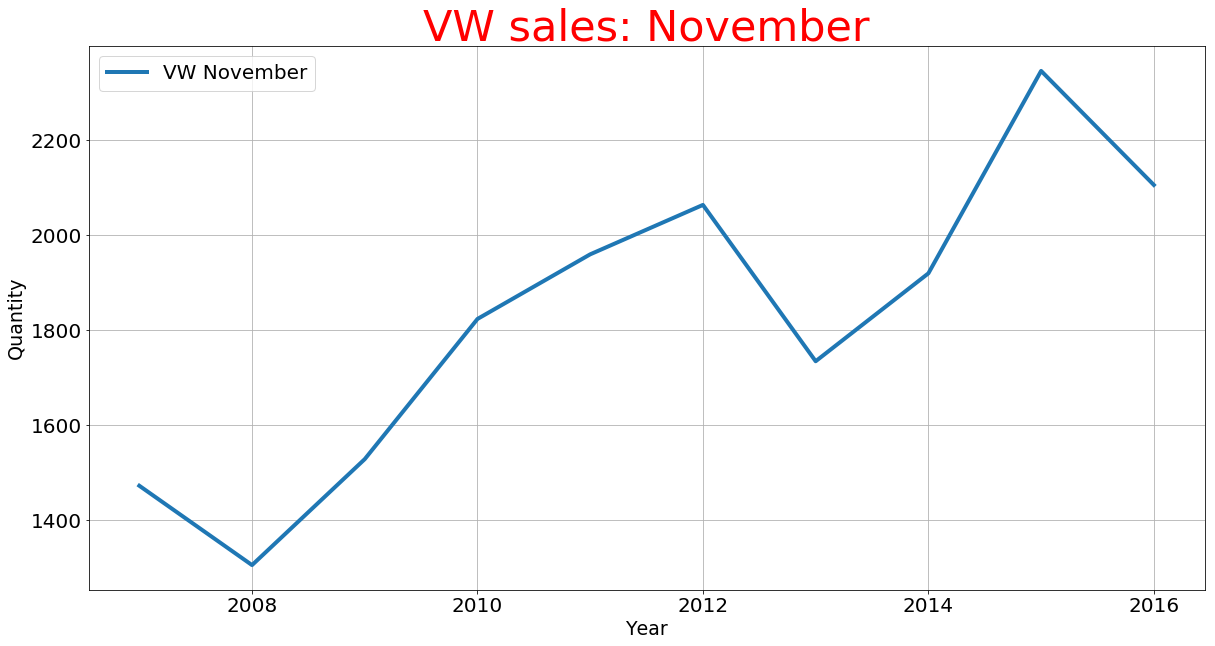

In [60]:
#Step 1:  select only those rows that have make = "Volkswagen"
df_vw = df.where(df["Make"] == "Volkswagen").dropna()

#Step 2:  select only those rows that have month = 11.
df_vw_nov = df_vw.where(df_vw["Month"] == 11).dropna()


#Step 3:  Start plotting!
import matplotlib.pyplot as plt

'''
Create an empty canvass f of size 20 inch times 10 inch
'''
f = plt.figure(figsize = (20,10))  

'''
Plot Quantity against year. 

'''

plt.plot(df_vw_nov['Year'],df_vw_nov['Quantity'],label =  "VW November", linewidth = 4 ) 

'''
Beautifying figure by adding labels, legends, and changing tick sizes. You can experiment with various parameters and
see how it looks
'''
plt.xlabel("Year", fontsize = 19)
plt.legend(fontsize = 20)
plt.ylabel("Quantity", fontsize = 19)
plt.title("VW sales: November", fontsize = 43, color = "red")
plt.tick_params(labelsize=20)
plt.grid()
plt.show()

**Question 3:** What is the average sale made by Volvo each month in the period of 2007-2017?

**Answer**: The purpose to have third question here is to introduce the method ***groupby***. 

Step 1: Business as usual! Let us select those rows ***where*** maker is equal to volvo. Do not forget to drop NAs
Step 2: We will ***group*** same months together using ***groupby***. Then, we compute average of the ***groupby*** object.


In [61]:
df_volvo = df.where(df["Make"] == "Volvo").dropna()
df_volvo = df_volvo.set_index(['Year'])
df_volvo_month = df_volvo.groupby('Month').mean()

Let us plot the data as well. August being the worst month and December being the best month gives good indication for company on where to focus!

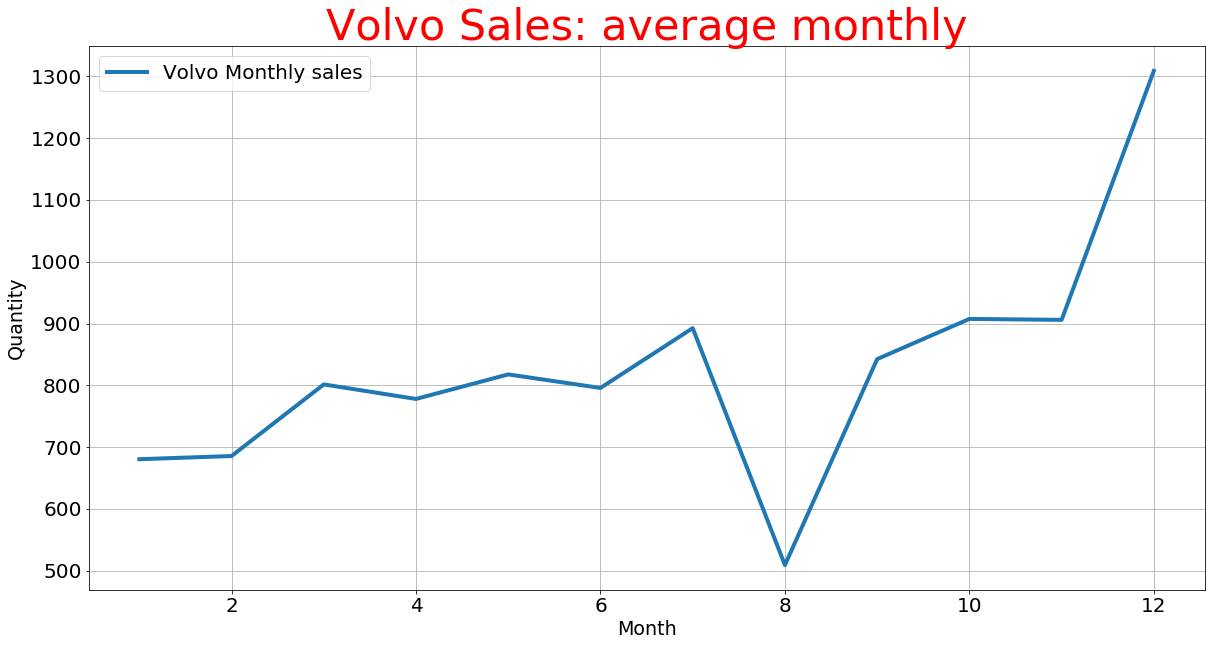

In [62]:
f = plt.figure(figsize = (20,10))  
plt.plot(df_volvo_month.index,df_volvo_month['Quantity'],label =  "Volvo Monthly sales", linewidth = 4 ) 
plt.xlabel("Month", fontsize = 19)
plt.legend(fontsize = 20)
plt.ylabel("Quantity", fontsize = 19)
plt.title("Volvo Sales: average monthly", fontsize = 43, color = "red")
plt.tick_params(labelsize=20)
plt.grid()
plt.show()


## 4.3 Conclusions and next steps

If you are able to understand various steps outlined here and reproduce these after going through the solutions, then you are all set to think about using great great Pandas in your analysis.Since it is impossible to discuss all functions and methods of pandas in this tutorial, we will use basics learnt here analyze real world examples as we move foreward. Before we move on to next chapter on Applications, let us solve one example which has intermediate level of difficulty. 

## Exercise

Consider following car companies: "Toyota", "Volkswagen", and "Volvo". Plot their average monthly sales on the same plot. What inference you can draw about sales by looking at the plot? [Hint: Look how sale of one maker rises when sale of the other declines]

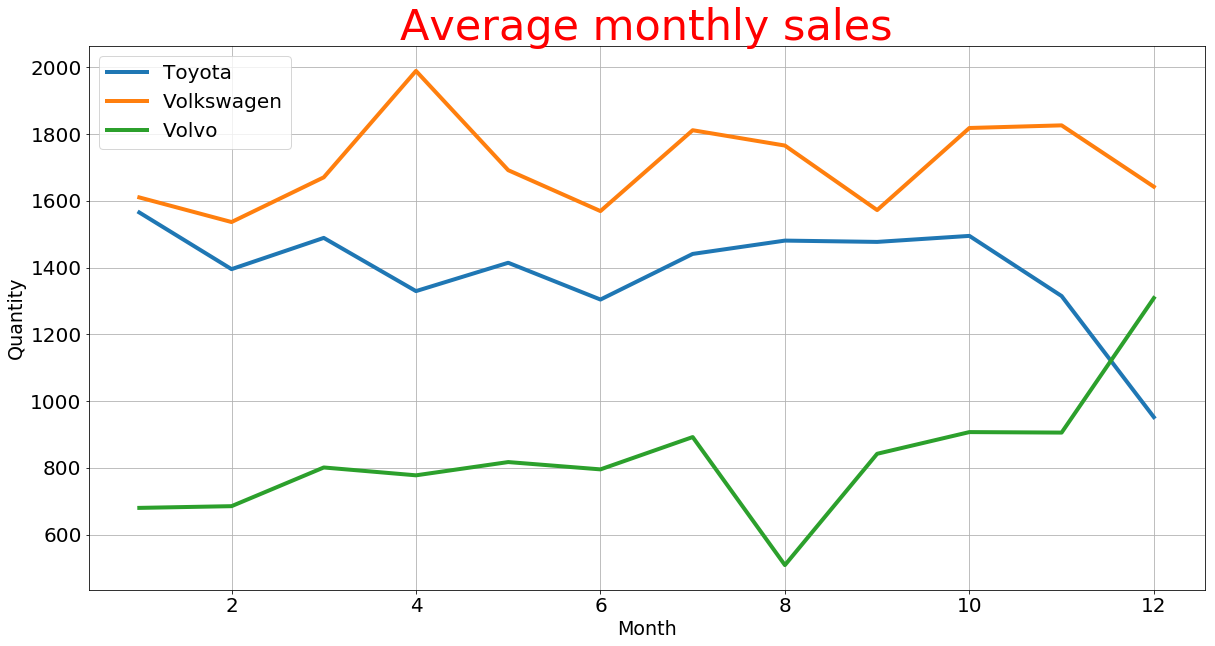

In [64]:
Makers = ['Toyota','Volkswagen','Volvo']

f = plt.figure(figsize = (20,10))  



for make in Makers:
    temp = df.where(df["Make"] == make).dropna()
    temp = temp.set_index(['Year'])
    temp = temp.groupby('Month').mean()
    plt.plot(temp.index,temp['Quantity'],label =  make, linewidth = 4 ) 
    plt.xlabel("Month", fontsize = 19)
    plt.legend(fontsize = 20)
    plt.ylabel("Quantity", fontsize = 19)
    plt.title("Average monthly sales", fontsize = 43, color = "red")
    plt.tick_params(labelsize=20)
    plt.grid()
plt.show()
